In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf


In [ ]:
"Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]


In [12]:
TC=pd.read_csv("Downloads\\ToyotaCorolla.csv",encoding='latin1')
TC

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [13]:
TC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [18]:
TC1=pd.concat([TC.iloc[:,2:4],TC.iloc[:,6:7],TC.iloc[:,8:9],TC.iloc[:,12:14],TC.iloc[:,15:18]],axis=1)
TC1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [20]:
TC2=TC1.rename(columns={'Age_08_04':'Age','Quarterly_Tax':'QT','Weight':'Wt'})
TC2

,Price,Age,KM,HP,cc,Doors,Gears,QT,Wt
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [21]:
TC3=TC2.drop_duplicates().reset_index(drop=True)
TC3

,Price,Age,KM,HP,cc,Doors,Gears,QT,Wt
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [22]:
TC3.describe()

,Price,Age,KM,HP,cc,Doors,Gears,QT,Wt
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


In [23]:
TC3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1435 non-null   int64
 1   Age     1435 non-null   int64
 2   KM      1435 non-null   int64
 3   HP      1435 non-null   int64
 4   cc      1435 non-null   int64
 5   Doors   1435 non-null   int64
 6   Gears   1435 non-null   int64
 7   QT      1435 non-null   int64
 8   Wt      1435 non-null   int64
dtypes: int64(9)
memory usage: 101.0 KB


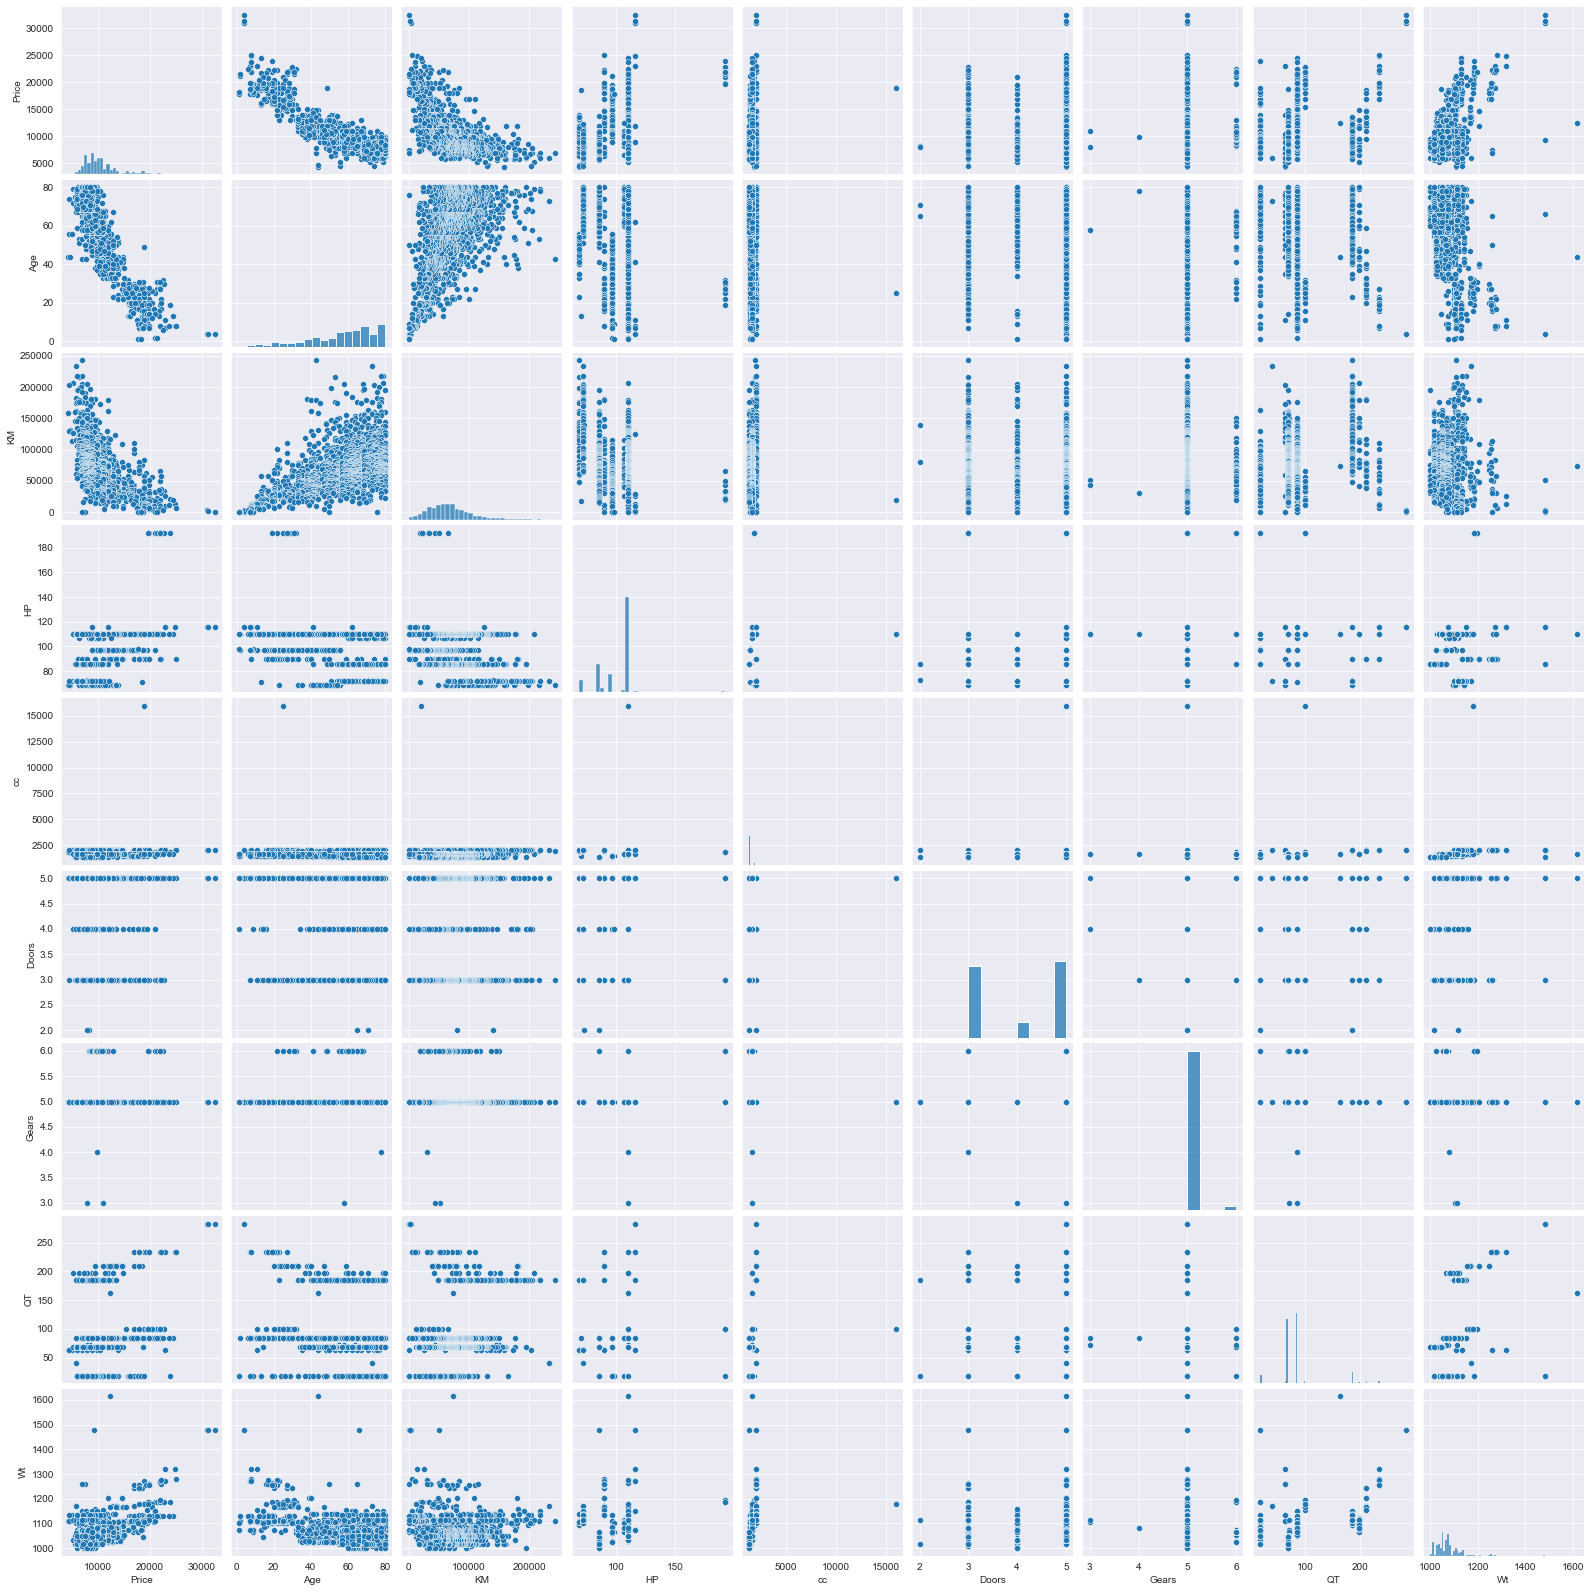

In [24]:
sns.set_style(style='darkgrid')
sns.pairplot(TC3)

In [25]:
model=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QT+Wt',data=TC3).fit()


In [26]:
TC3['Predicted']=model.fittedvalues
TC3

,Price,Age,KM,HP,cc,Doors,Gears,QT,Wt,Predicted
0,13500,23,46986,90,2000,3,5,210,1165,16791.958871
1,13750,23,72937,90,2000,3,5,210,1165,16253.800414
2,13950,24,41711,90,2000,3,5,210,1165,16779.635210
3,14950,26,48000,90,2000,3,5,210,1165,16405.789389
4,13750,30,38500,90,2000,3,5,210,1170,16200.217277
...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025,8794.255037
1431,10845,72,19000,86,1300,3,5,69,1015,8292.577342
1432,8500,71,17016,86,1300,3,5,69,1015,8455.434402
1433,7250,70,16916,86,1300,3,5,69,1015,8579.222041


In [27]:
TC3['Error']=model.resid
TC3

,Price,Age,KM,HP,cc,Doors,Gears,QT,Wt,Predicted,Error
0,13500,23,46986,90,2000,3,5,210,1165,16791.958871,-3291.958871
1,13750,23,72937,90,2000,3,5,210,1165,16253.800414,-2503.800414
2,13950,24,41711,90,2000,3,5,210,1165,16779.635210,-2829.635210
3,14950,26,48000,90,2000,3,5,210,1165,16405.789389,-1455.789389
4,13750,30,38500,90,2000,3,5,210,1170,16200.217277,-2450.217277
...,...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025,8794.255037,-1294.255037
1431,10845,72,19000,86,1300,3,5,69,1015,8292.577342,2552.422658
1432,8500,71,17016,86,1300,3,5,69,1015,8455.434402,44.565598
1433,7250,70,16916,86,1300,3,5,69,1015,8579.222041,-1329.222041


In [28]:
model.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
cc             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
Wt             16.855470
dtype: float64

In [29]:
model.pvalues

Intercept     1.113392e-04
Age          1.879217e-288
KM            1.994713e-56
HP            5.211155e-28
cc            1.882393e-01
Doors         9.816443e-01
Gears         2.452430e-03
QT            3.290363e-03
Wt            1.031118e-51
dtype: float64

In [30]:
(model.rsquared,model.rsquared_adj)

(0.8625200256947001, 0.8617487495415147)

In [31]:
rsq_Age=smf.ols('Age~KM+HP+cc+Doors+Gears+QT+Wt',data=TC3).fit().rsquared
vif_Age=1/(1-rsq_Age)

In [32]:
rsq_KM=smf.ols('KM~Age+HP+cc+Doors+Gears+QT+Wt',data=TC3).fit().rsquared
vif_KM=1/(1-rsq_KM)

In [33]:
rsq_HP=smf.ols('HP~KM+Age+cc+Doors+Gears+QT+Wt',data=TC3).fit().rsquared
vif_HP=1/(1-rsq_HP)

In [35]:
rsq_cc=smf.ols('cc~KM+HP+Age+Doors+Gears+QT+Wt',data=TC3).fit().rsquared
vif_cc=1/(1-rsq_cc)

In [36]:
rsq_Doors=smf.ols('Doors~KM+HP+cc+Age+Gears+QT+Wt',data=TC3).fit().rsquared
vif_Doors=1/(1-rsq_Doors)

In [37]:
rsq_Gears=smf.ols('Gears~KM+HP+cc+Doors+Age+QT+Wt',data=TC3).fit().rsquared
vif_Gears=1/(1-rsq_Gears)

In [38]:
rsq_QT=smf.ols('QT~KM+HP+cc+Doors+Gears+Age+Wt',data=TC3).fit().rsquared
vif_QT=1/(1-rsq_QT)

In [39]:
rsq_Wt=smf.ols('Wt~KM+HP+cc+Doors+Gears+QT+Age',data=TC3).fit().rsquared
vif_Wt=1/(1-rsq_Wt)

In [41]:
d1={'Variables':['Age','KM','HP','cc','Doors','Gears','QT','Wt'],'VIF':[vif_Age,vif_KM,vif_HP,vif_cc,vif_Doors,vif_Gears,vif_QT,vif_Wt]}
vif_frame=pd.DataFrame(d1)
vif_frame                                                                        

,Variables,VIF
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,cc,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QT,2.295375
7,Wt,2.487180


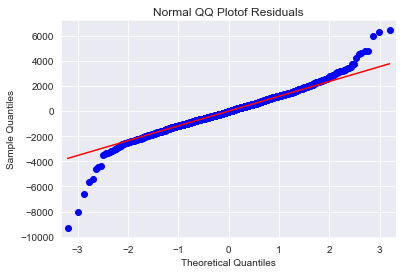

In [42]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal QQ Plotof Residuals")
plt.show()

<AxesSubplot:xlabel='Error'>

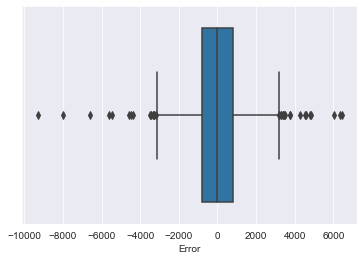

In [43]:
sns.boxplot(TC3['Error'])

<AxesSubplot:xlabel='Error', ylabel='Count'>

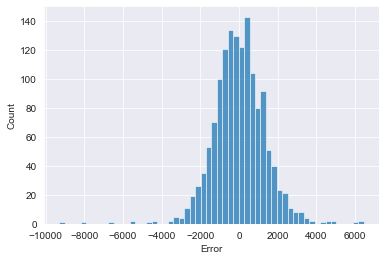

In [44]:
sns.histplot(TC3['Error'])

<AxesSubplot:xlabel='Error', ylabel='Density'>

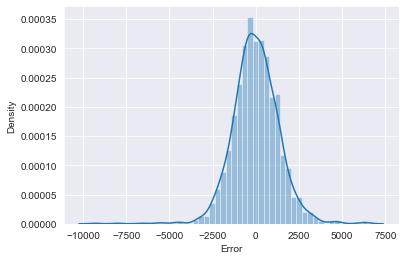

In [45]:
sns.distplot(TC3['Error'])

In [46]:
def get_standardized_values(vals):
    return (vals-vals.mean())/vals.std()

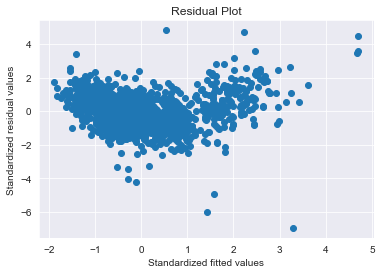

In [47]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [48]:
get_standardized_values(model.resid).mean()

-6.653601401934736e-17

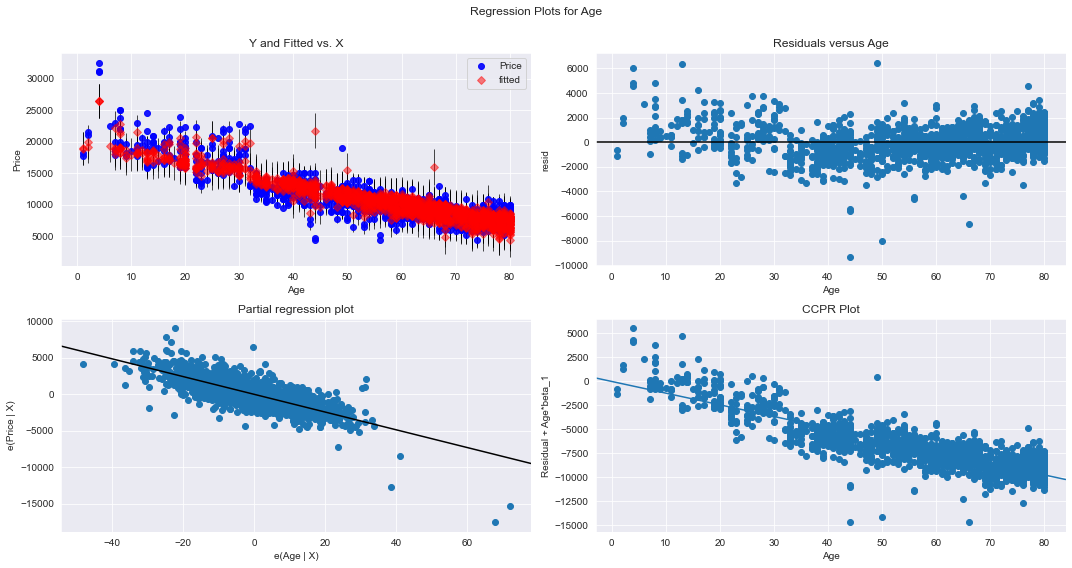

In [50]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Age",fig=fig)
plt.show()

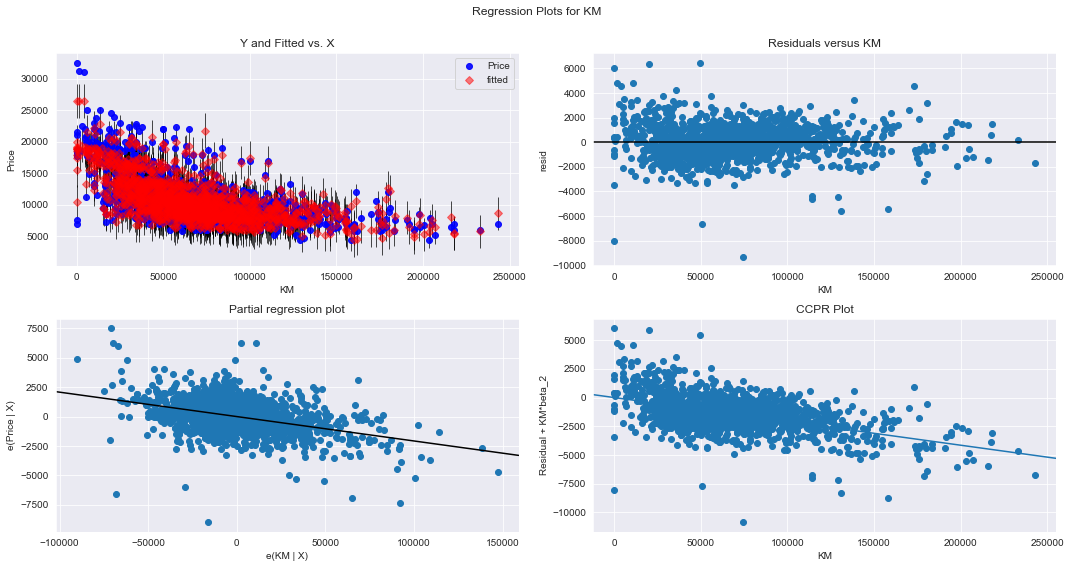

In [51]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"KM",fig=fig)
plt.show()

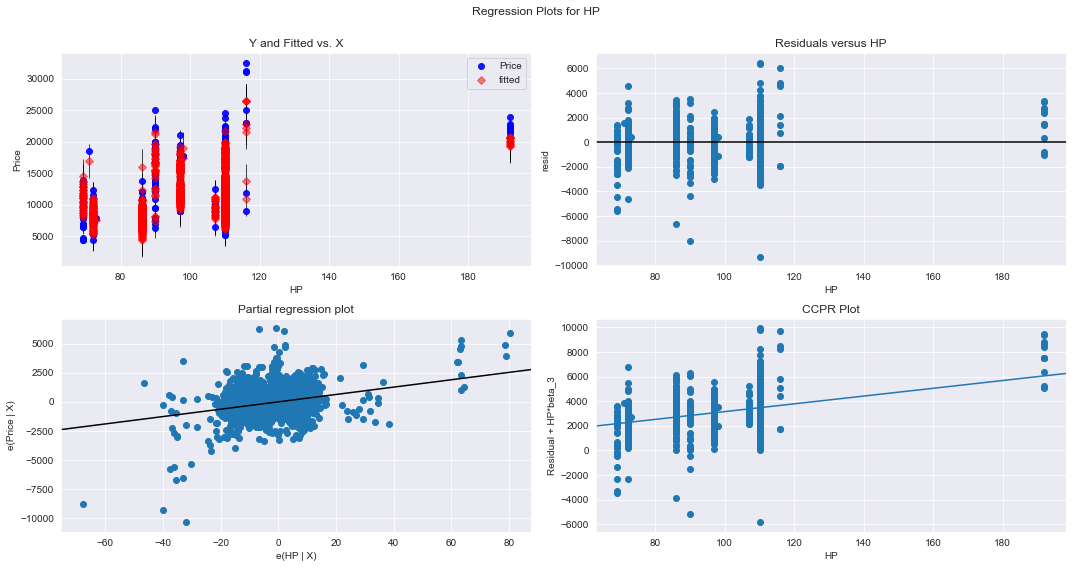

In [52]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"HP",fig=fig)
plt.show()

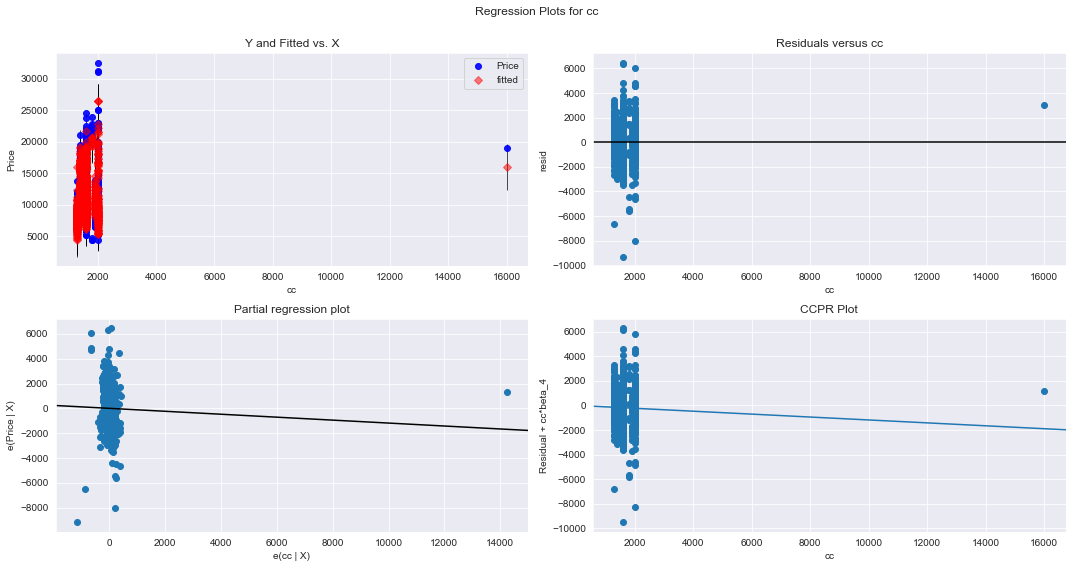

In [54]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"cc",fig=fig)
plt.show()

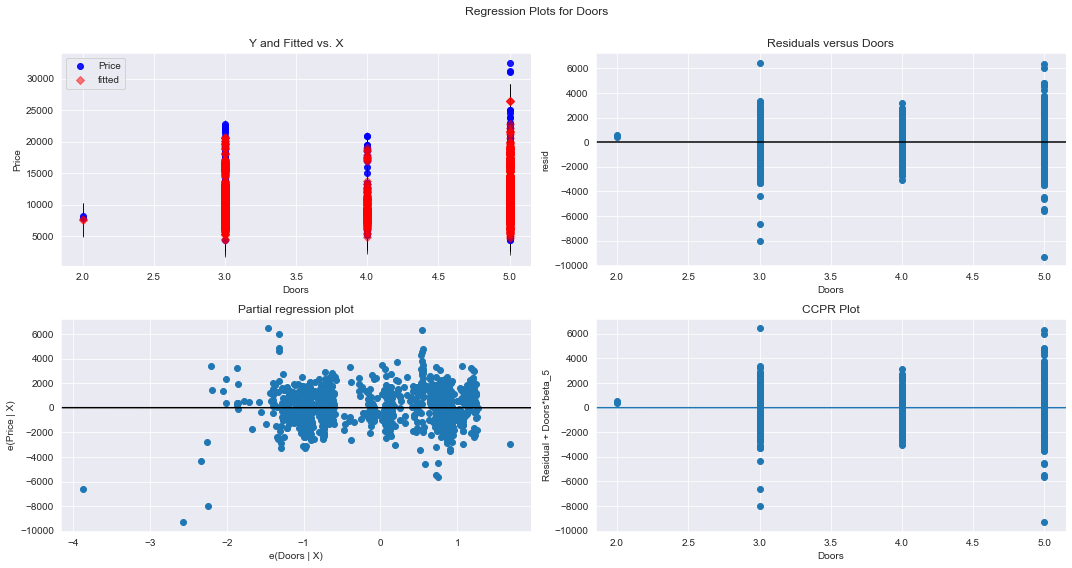

In [55]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Doors",fig=fig)
plt.show()

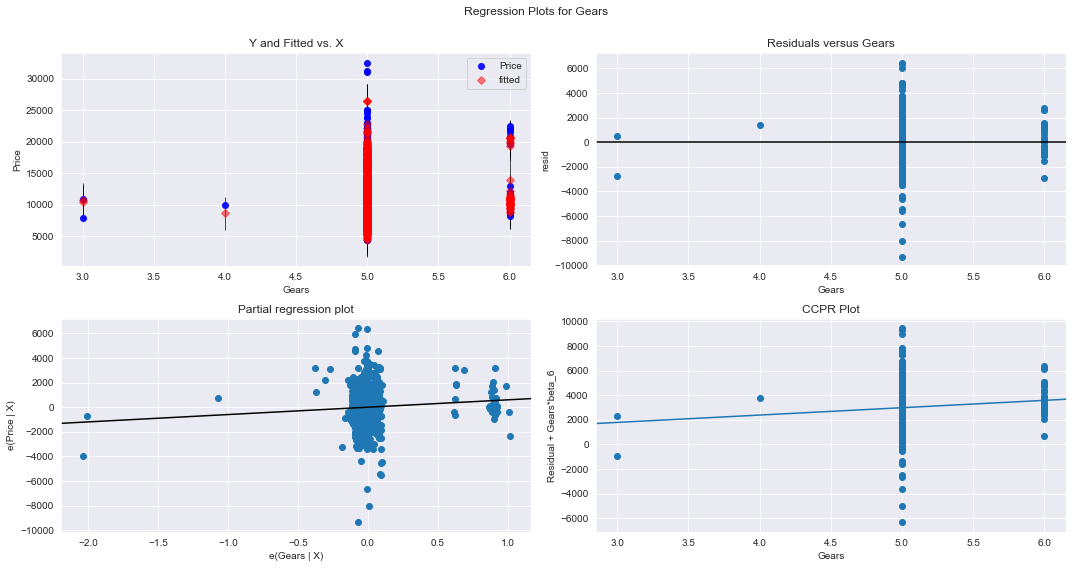

In [56]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Gears",fig=fig)
plt.show()

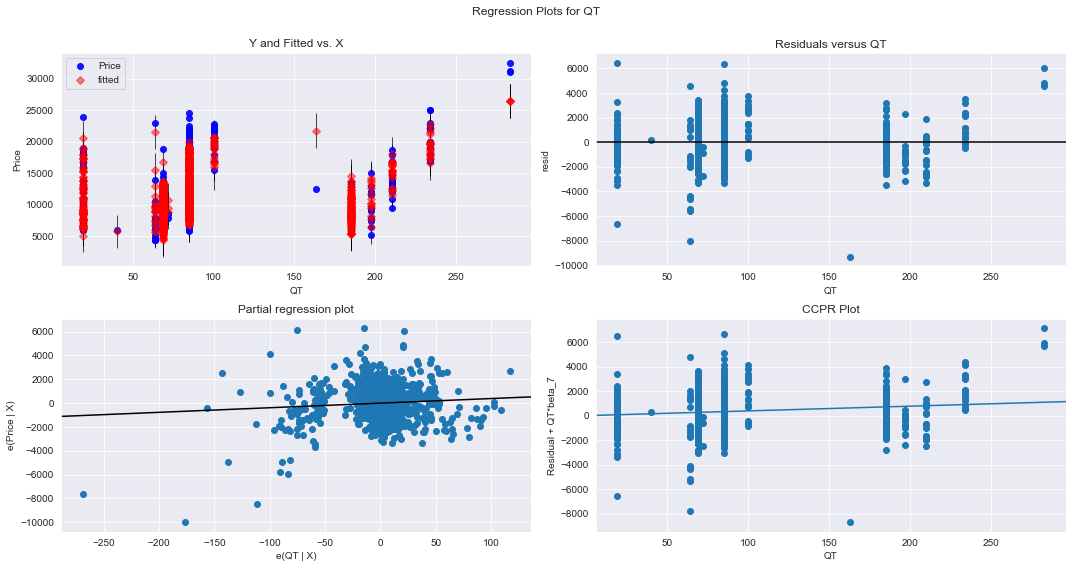

In [57]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"QT",fig=fig)
plt.show()

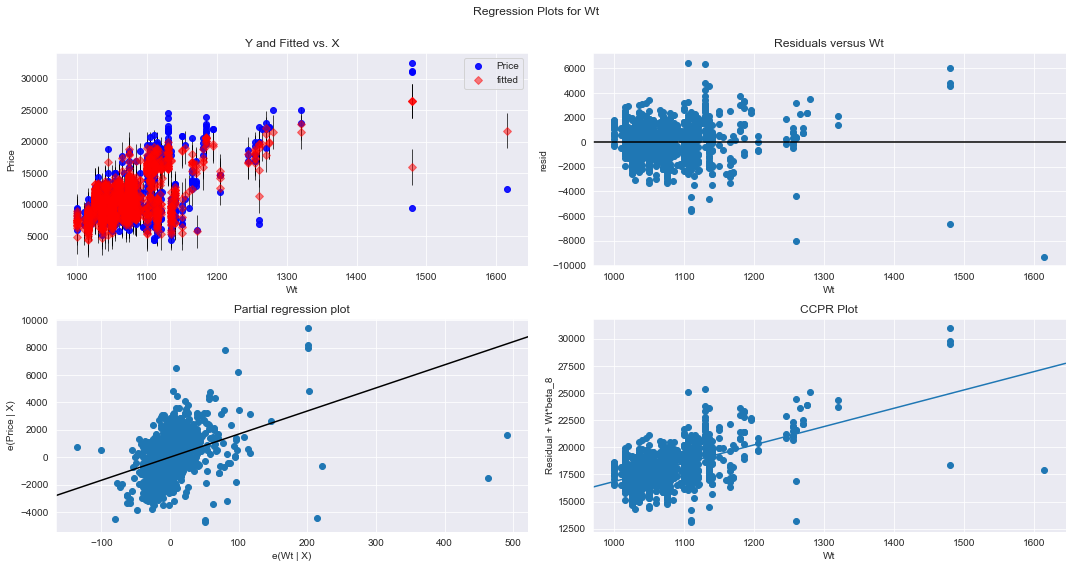

In [58]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Wt",fig=fig)
plt.show()

In [59]:
TC3.shape

(1435, 11)

In [60]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

In [61]:
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110550e-07, 6.99854767e-04, 1.08408002e-02])

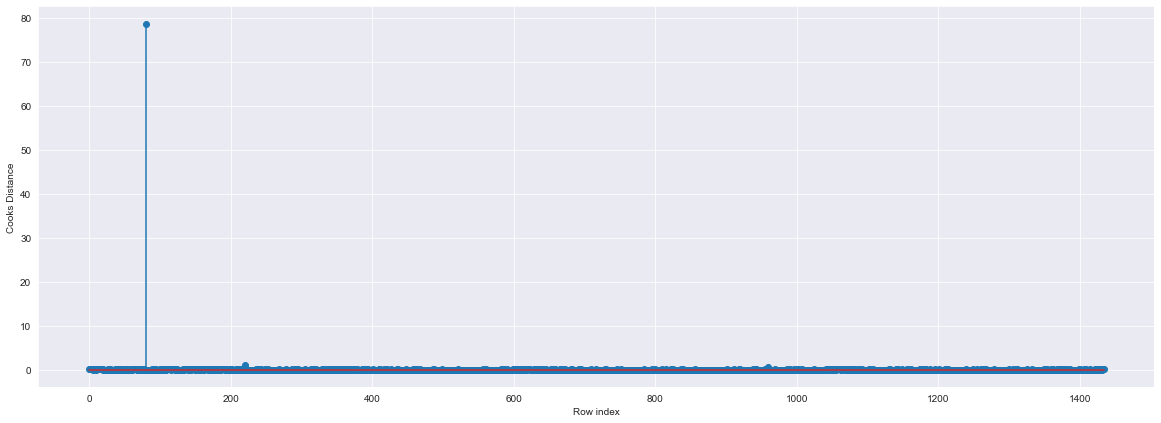

In [62]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(TC3)),np.round(c,3))
plt.xlabel("Row index")
plt.ylabel("Cooks Distance")
plt.show()

In [63]:
(np.argmax(c),np.max(c))

(80, 78.7295058224984)

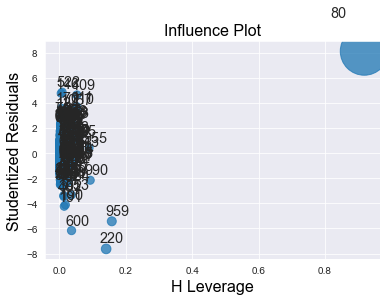

In [64]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [65]:
TC3.shape

(1435, 11)

In [66]:
k=9
n=1435
leverage_cutoff=3*((k+1)/n)
leverage_cutoff

0.020905923344947737

In [67]:
TC3[TC3.index.isin([80])]

,Price,Age,KM,HP,cc,Doors,Gears,QT,Wt,Predicted,Error
80,18950,25,20019,110,16000,5,5,100,1180,15906.167549,3043.832451


In [68]:
TC4=TC3.drop(TC3.index[80],axis=0).reset_index()
TC4

,index,Price,Age,KM,HP,cc,Doors,Gears,QT,Wt,Predicted,Error
0,0,13500,23,46986,90,2000,3,5,210,1165,16791.958871,-3291.958871
1,1,13750,23,72937,90,2000,3,5,210,1165,16253.800414,-2503.800414
2,2,13950,24,41711,90,2000,3,5,210,1165,16779.635210,-2829.635210
3,3,14950,26,48000,90,2000,3,5,210,1165,16405.789389,-1455.789389
4,4,13750,30,38500,90,2000,3,5,210,1170,16200.217277,-2450.217277
...,...,...,...,...,...,...,...,...,...,...,...,...
1429,1430,7500,69,20544,86,1300,3,5,69,1025,8794.255037,-1294.255037
1430,1431,10845,72,19000,86,1300,3,5,69,1015,8292.577342,2552.422658
1431,1432,8500,71,17016,86,1300,3,5,69,1015,8455.434402,44.565598
1432,1433,7250,70,16916,86,1300,3,5,69,1015,8579.222041,-1329.222041


In [69]:
TC4.shape

(1434, 12)

In [70]:
TC4=TC4.drop(['index'],axis=1)
TC4

,Price,Age,KM,HP,cc,Doors,Gears,QT,Wt,Predicted,Error
0,13500,23,46986,90,2000,3,5,210,1165,16791.958871,-3291.958871
1,13750,23,72937,90,2000,3,5,210,1165,16253.800414,-2503.800414
2,13950,24,41711,90,2000,3,5,210,1165,16779.635210,-2829.635210
3,14950,26,48000,90,2000,3,5,210,1165,16405.789389,-1455.789389
4,13750,30,38500,90,2000,3,5,210,1170,16200.217277,-2450.217277
...,...,...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025,8794.255037,-1294.255037
1430,10845,72,19000,86,1300,3,5,69,1015,8292.577342,2552.422658
1431,8500,71,17016,86,1300,3,5,69,1015,8455.434402,44.565598
1432,7250,70,16916,86,1300,3,5,69,1015,8579.222041,-1329.222041
